# Test DTAIDistance

In [82]:
%load_ext autoreload
%autoreload 2

import dtw_missing.dtw_missing as dtw_m
import dtw_missing.dtw_missing_visualisation as dtw_m_vis
print(dtw_m.__file__)

import numpy as np

from dtaidistance import dtw
print(dtw.__file__)
from dtaidistance import dtw_visualisation as dtwvis

from scipy.spatial import distance as scpydst

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/cw/dtaijupiter/NoCsBack/dtai/aras/Missing_values_in_DTW/missing_dtw_public/dtw_missing/dtw_missing.py
/cw/dtaijupiter/NoCsBack/dtai/aras/miniconda3/envs/missing_dtw_public/lib/python3.11/site-packages/dtaidistance/dtw.py


## Some functions:

In [83]:
def make_column_vector(x): # make the 1-D array a numpy column vector
    x  =  np.array(x).squeeze()
    assert x.ndim == 1
    x  =  np.expand_dims(x, axis=1)
    return x

def pairwise_distances(x, y): # calculate pairwise (squared Euclidean) distance matrix
    # return prdst(x, y)**2
    return scpydst.cdist(x, y)**2 # same result

def plot_warping_switched(y, x, best_path, **kwargs): # plot by switching y and x
    best_path = list(map(lambda o: o[::-1], best_path)) # take the transpose of the path
    
    # dtwvis.plot_warping(x, y, best_path, figsize=(2.5,1.5)) # reverse x and y
    dtwvis.plot_warping(x, y, best_path) # reverse x and y

def plot_missing_warping_switched(y, x, best_path, **kwargs): # plot by switching y and x
    best_path = list(map(lambda o: o[::-1], best_path)) # take the transpose of the path
    
    # dtwvis.plot_warping(x, y, best_path, figsize=(2.5,1.5)) # reverse x and y
    dtw_m_vis.plot_warping(x, y, best_path, **kwargs) # reverse x and y

## Data:

In [84]:
# x = np.array([0, 0, 0, 0.1, 0.3, 0.7, 1.3, 1.5, 1.3, 0.7, 0.3, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0.5, 0.5, 0, 0, 0]) + 0.01
# x = np.array([0, 0.3, 0.7, 1.5, 1.3, 0.1, 0, 0, 0.9, 0.7, 0, 0]) + 0.01
x = np.array([0, 0, 1, 1.5, 1.7, 0.8, 0.4, 0.4, 1.1, 0, 0]) + 0.15
# x = np.array([0, 0, 1, 1.5, 1.7, 0.8, 0.4, 0.4, 1.1, 0, 0, 0.5, 0]) + 0.15
# x = np.array([0, 0, 0, 0.1, 0.3, 0.7, 1.3, 1.5, 1.3, 0.7, 0.3, 0.1, 0, 0, 0]) + 0.01
# x = np.array([3, 4]) + 10

# y = np.array([0, 0, 0, 0, 0, 0, 0.1, 0.3, 0.7, 1.3, 1.5, 1.3, 0.7, 0.3, 0.1, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0])
# y = np.array([0, 0.1, 0.7, 1.5, 1, 0, 0.8, 0.8, 0.8, 0.8, 0.5, 0])
y = np.array([0, 1, 1.5, 1.5, 1.3, 0, 0, 1.1, 1.1, 1.1, 0])
# y = np.array([0, 0, 0, 0, 0, 0, 0.1, 0.3, 0.7, 1.3, 1.5, 1.3, 0.7, 0.3, 0.1, 0])
# y = np.array([0, 0]) + 10

# x = np.array([1, 2, 3])
# y = np.array([0, 0, 0])

## Set DTW parameters:

In [85]:
# Default values:
dtw_params = {
    'window' : None,
    'max_dist' : None,
    'use_pruning' : False,
    'max_step' : None,
    'max_length_diff' : None,
    'penalty' : None,
    'psi' : None, #(2, 3, 4, 5), # (begin series1, end series1, begin series2, end series2)
    'psi_neg' : True,
    'use_c' : False,
    'use_ndim' : False,
}

## dtaidistance.dtw:

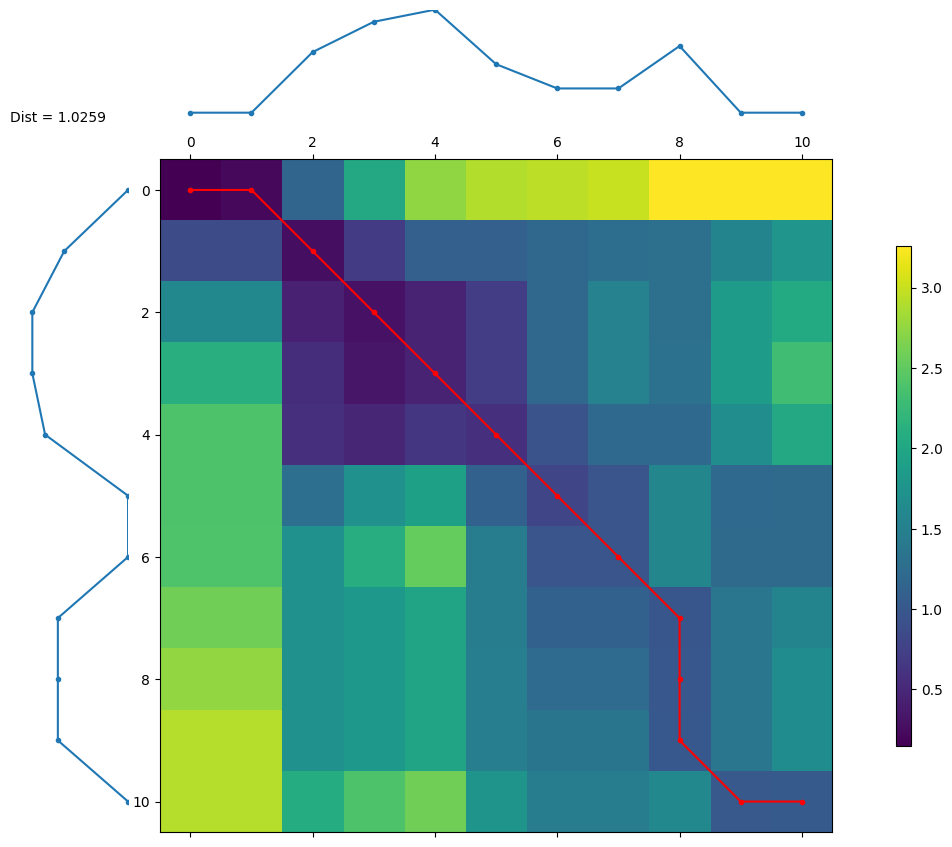

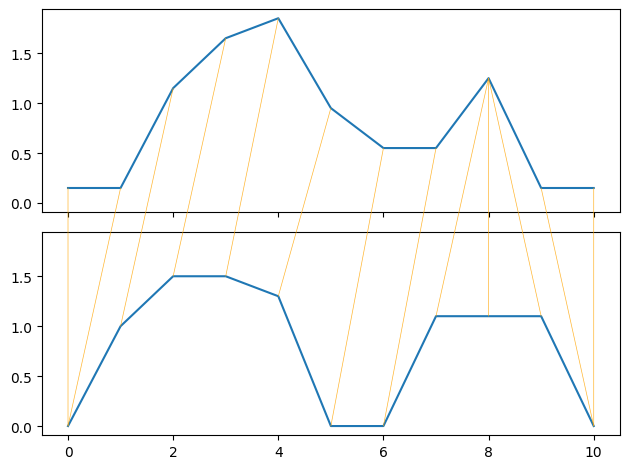

In [86]:
d_matrix = pairwise_distances(make_column_vector(y), make_column_vector(x))

# d_, paths_ = dtw.warping_paths(y, x, d_matrix=d_matrix, window=None, psi=None)
d_, paths_ = dtw.warping_paths(y, x, **dtw_params)

best_path_ = dtw.best_path(paths_)

# dtwvis.plot_warpingpaths(y, x, paths_, best_path_, showlegend=True, figsize=(3, 3)) # same result as above
dtwvis.plot_warpingpaths(y, x, paths_, best_path_, showlegend=True) # same result as above

plot_warping_switched(y, x, best_path_)

# dtw_missing.dtw

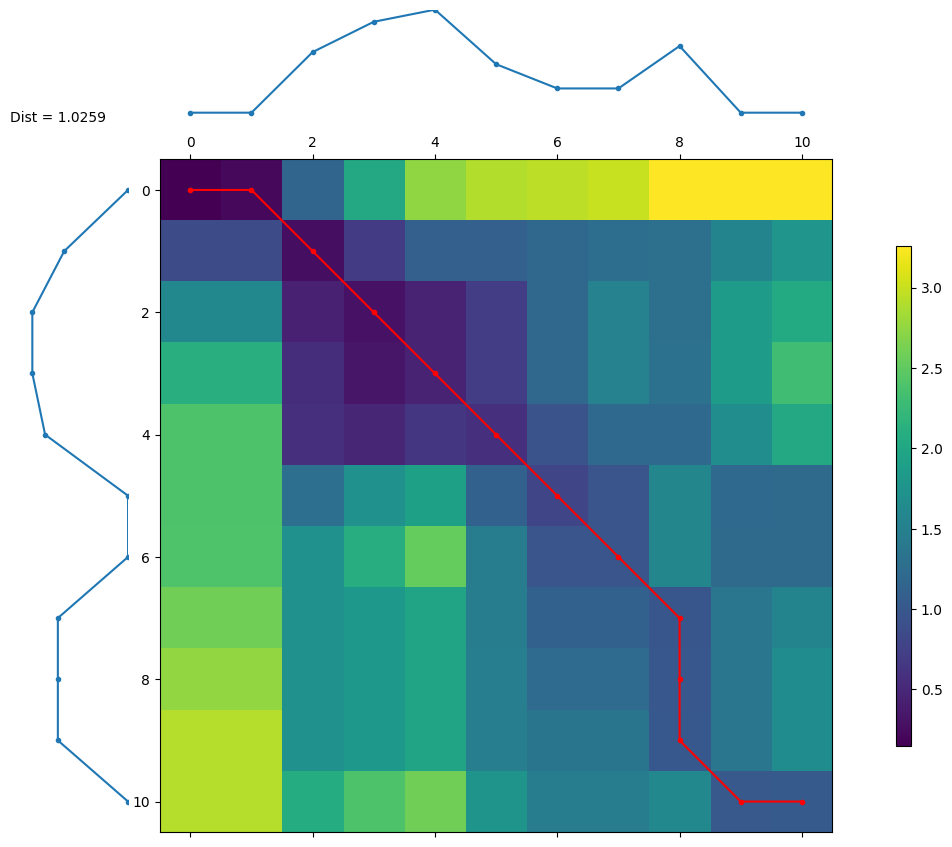

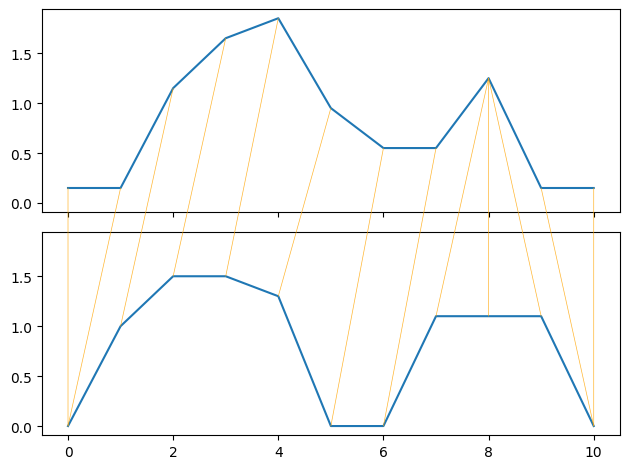

In [87]:
d_matrix = pairwise_distances(make_column_vector(y), make_column_vector(x))

# d_, paths_ = dtw.warping_paths(y, x, d_matrix=d_matrix, window=None, psi=None)
# d_, paths_ = dtw_m.warping_paths(y, x, **dtw_params)
# best_path_ = dtw.best_path(paths_)

d_, paths_, best_path_ = dtw_m.warping_paths(y, x, return_optimal_warping_path=True, **dtw_params)

# dtwvis.plot_warpingpaths(y, x, paths_, best_path_, showlegend=True, figsize=(3, 3)) # same result as above
dtwvis.plot_warpingpaths(y, x, paths_, best_path_, showlegend=True) # same result as above

plot_warping_switched(y, x, best_path_)

# Introduce missing values:

In [88]:
x[2:4] = np.nan
y[7:8] = np.nan

# dtw_missing.dtw with missing data

In [89]:
dtw_m_params = dtw_params
dtw_m_params.update({
                     'missing_value_restrictions': 'full', 
                     'missing_value_adjustment': 'proportion_of_missing_values',
                    })

1.0679542667125188


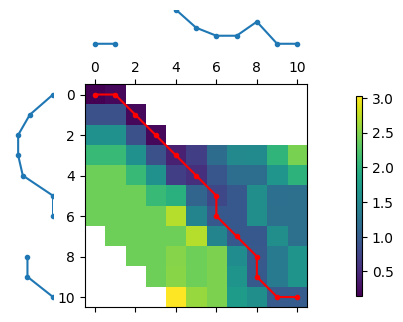

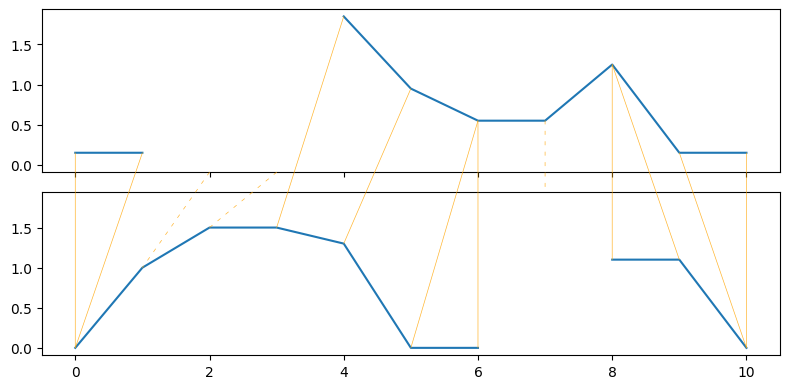

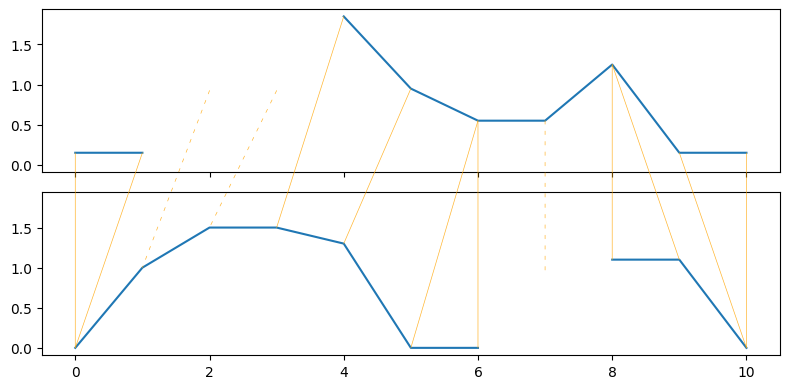

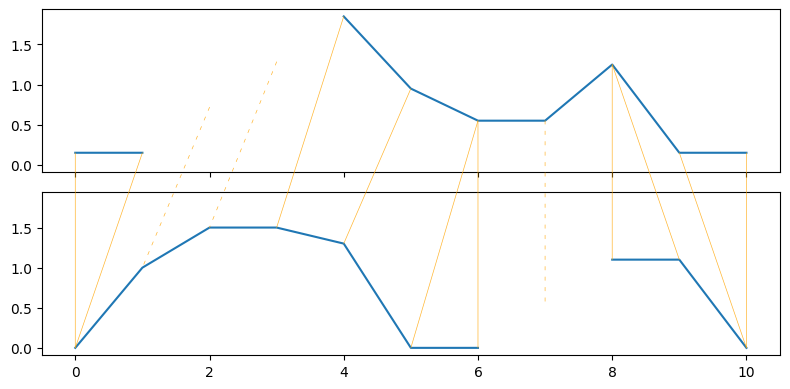

In [90]:
d_matrix = pairwise_distances(make_column_vector(y), make_column_vector(x))

# d_, paths_ = dtw.warping_paths(y, x, d_matrix=d_matrix, window=None, psi=None)
# d_, paths_ = dtw_m.warping_paths(y, x, **dtw_params)
# best_path_ = dtw.best_path(paths_)

d_, paths_, best_path_ = dtw_m.warping_paths(y, x, return_optimal_warping_path=True, **dtw_params)

print(d_)

dtw_m_vis.plot_warpingpaths(y, x, paths_, best_path_, showlegend=True) # same result as above

plot_missing_warping_switched(y, x, best_path_, missing_time_sample_location='edge')
plot_missing_warping_switched(y, x, best_path_, missing_time_sample_location='middle')
plot_missing_warping_switched(y, x, best_path_, missing_time_sample_location='interpolation')